Importando bibliotecas e carregando o dataset

In [12]:
import pandas as pd

df = pd.read_csv('/content/world_olympedia_olympics_athlete_bio.csv')


In [13]:
# Selecionando apenas algumas colunas
colunas_selecionadas = ['athlete_id', 'name', 'sex', 'country', 'country_noc']

# Criando um novo df com as colunas desejadas
df_col = df[colunas_selecionadas]

# Exibindo as primeiras linhas do novo DataFrame para verificar
print(df_col.head())

   athlete_id             name   sex country country_noc
0     2303707      A. Sansores  Male    Cuba         CUB
1     2303703     Álvaro Ledón  Male    Cuba         CUB
2      921722  Abelardo Cuevas  Male    Cuba         CUB
3     2303702     V. Fernández  Male    Cuba         CUB
4     2303738       A. F. Ruiz  Male    Cuba         CUB


Análise descritiva dos dados

In [ ]:
# Verificando se tem valores ausentes nas colunas
df_col.isnull().sum()

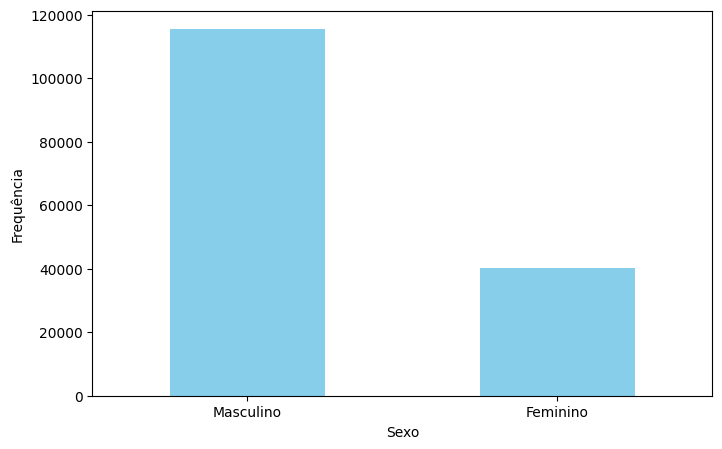

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df_col seja o seu DataFrame e já tenha a coluna 'sex'
# df_col = pd.read_csv('seu_arquivo.csv') # Exemplo de como você pode carregar o DataFrame

# Contagem dos valores de 'sex'
contagem_sex = df_col['sex'].value_counts()

# Mapear os valores do eixo x de inglês para português
mapa_sex = {
    'Male': 'Masculino',
    'Female': 'Feminino'
    # Adicione mais mapeamentos se houver outros valores
}

# Plotar o gráfico de barras
plt.figure(figsize=(8, 5))
contagem_sex.plot(kind='bar', color='skyblue')

# Definir rótulos personalizados no eixo x
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.xticks(ticks=range(len(contagem_sex.index)), labels=[mapa_sex.get(x, x) for x in contagem_sex.index], rotation=0)
plt.show()

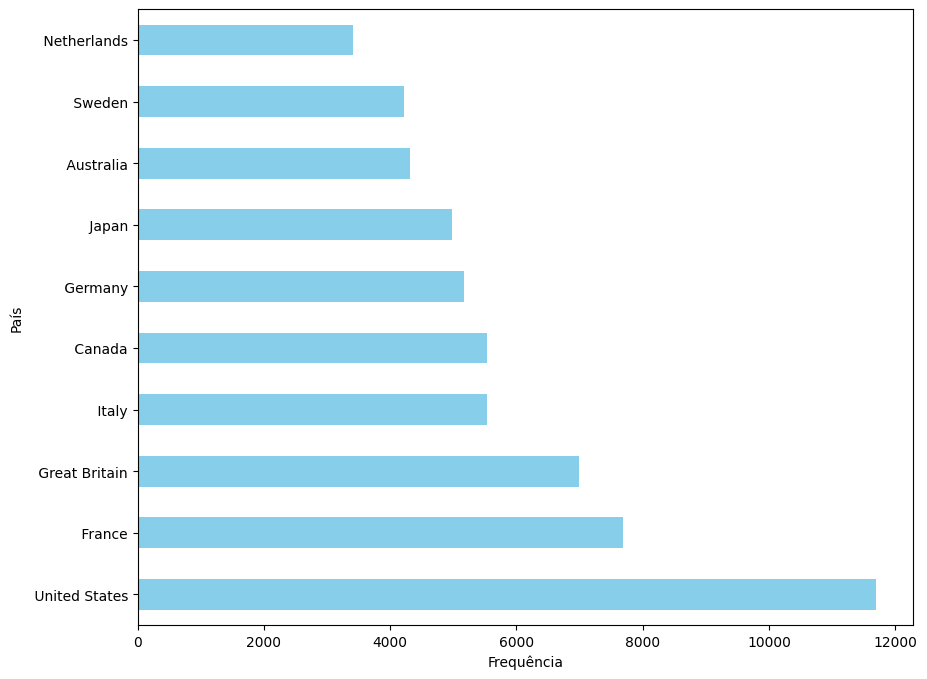

In [26]:
contagem_paises = df_col['country'].value_counts()

# Selecionar os 10 países mais frequentes (ajuste o número conforme necessário)
top_paises = contagem_paises.head(10)

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
top_paises.plot(kind='barh', color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('País')
plt.show()

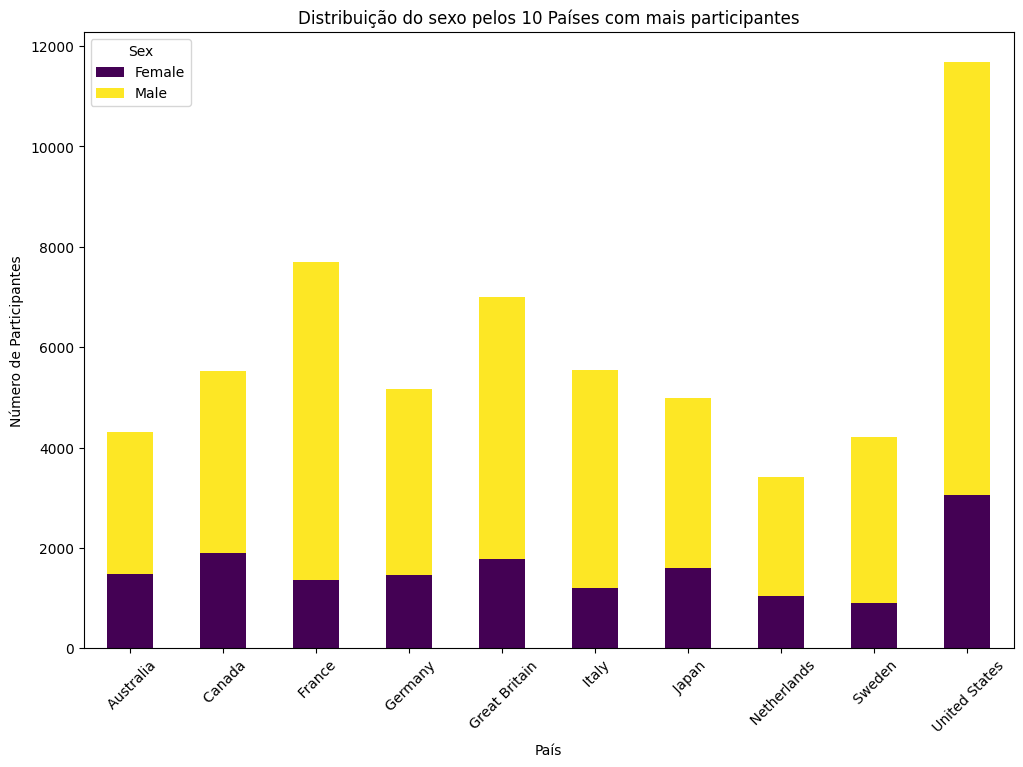

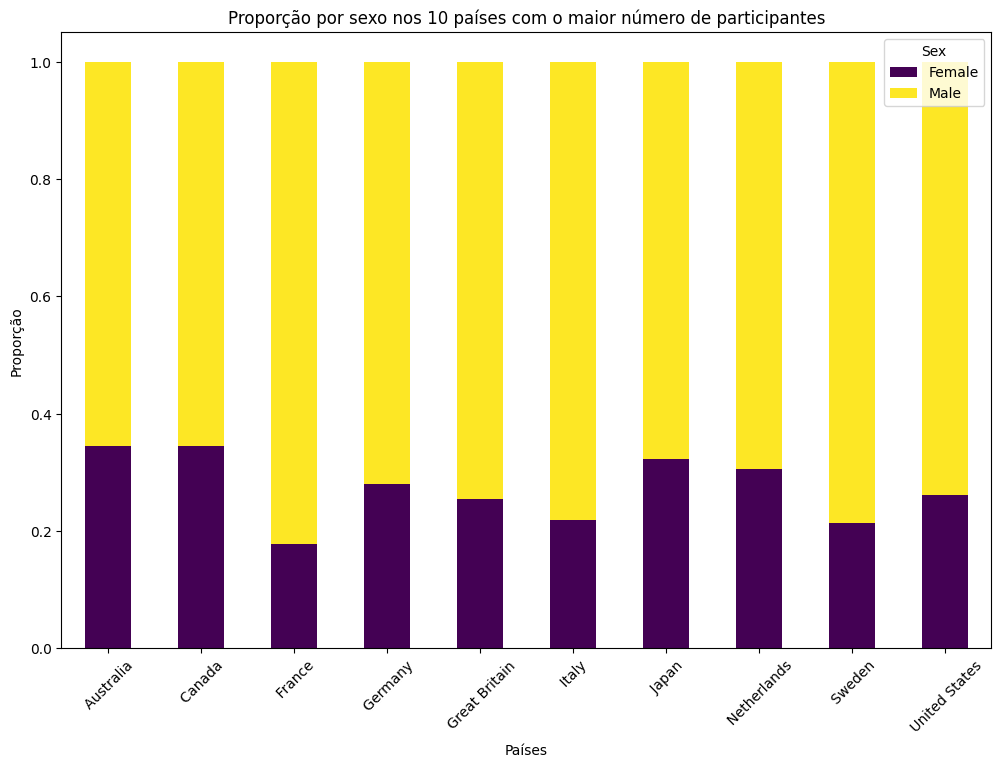

In [39]:
import pandas as pd
import seaborn as sns

# Identificar os 10 países com mais participantes
top_10_paises = df_col['country'].value_counts().head(10).index

# Filtrar o DataFrame para incluir apenas esses países
df_top_10 = df_col[df_col['country'].isin(top_10_paises)]

# Contar a frequência de cada sexo dentro desses países
contagem_sex_paises = df_top_10.groupby(['country', 'sex']).size().unstack()

# Gerar gráficos para visualizar a distribuição
plt.figure(figsize=(12, 8))
contagem_sex_paises.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Distribuição do sexo pelos 10 Países com mais participantes')
plt.xlabel('País')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

# Identificar os 10 países com mais participantes
top_10_paises = df_col['country'].value_counts().head(10).index

# Filtrar o DataFrame para incluir apenas esses países
df_top_10 = df_col[df_col['country'].isin(top_10_paises)]

# Contar o número total de participantes por país
total_participantes_por_pais = df_top_10['country'].value_counts()

# Contar o número de homens e mulheres por país
contagem_sex_por_pais = df_top_10.groupby(['country', 'sex']).size().unstack()

# Calcular a proporção de cada sexo
proporcao_sex_por_pais = contagem_sex_por_pais.div(total_participantes_por_pais, axis=0)

plt.figure(figsize=(12, 8))
proporcao_sex_paises.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Proporção por sexo nos 10 países com o maior número de participantes')
plt.xlabel('Países')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

In [41]:
import pandas as pd

df = pd.read_csv('/content/world_olympedia_olympics_athlete_event_result.csv')

print(df)

                     edition  edition_id country_noc         sport  \
0       1928 Winter Olympics          30         SUI      Skeleton   
1       1928 Winter Olympics          30         FRA      Skeleton   
2       1928 Winter Olympics          30         FRA      Skeleton   
3       1928 Winter Olympics          30         GBR      Skeleton   
4       1928 Winter Olympics          30         SUI      Skeleton   
...                      ...         ...         ...           ...   
316829  2022 Winter Olympics          62         ESP  Snowboarding   
316830  2022 Winter Olympics          62         FRA  Snowboarding   
316831  2022 Winter Olympics          62         NZL  Snowboarding   
316832  2022 Winter Olympics          62         ITA  Snowboarding   
316833  2022 Winter Olympics          62         ITA  Snowboarding   

                    event  result_id                  athlete  athlete_id  \
0           Skeleton, Men          1         Willy von Eschen       98710   
1    

<ipython-input-41-efda6a7d35f3>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/world_olympedia_olympics_athlete_event_result.csv')


In [65]:
import pandas as pd

# Realizar a mesclagem
df_final = pd.merge(df_col, df, on='athlete_id', how='outer')

df_female = df_final.loc[df_final['sex'] == 'Female']

print(df_female.head())

    athlete_id              name     sex country country_noc_x  \
42       65336    Edwige Bancole  Female   Benin           BEN   
57     1005058      María Solari  Female   Chile           CHI   
74       31914  Micheline Okemba  Female   Congo           CGO   
75       31910   Yvonne Makouala  Female   Congo           CGO   
76       31903   Isabelle Azanga  Female   Congo           CGO   

                 edition  edition_id country_noc_y          sport  \
42  1980 Summer Olympics          20           BEN      Athletics   
57  1960 Winter Olympics          36           CHI  Alpine Skiing   
74  1980 Summer Olympics          20           CGO       Handball   
75  1980 Summer Olympics          20           CGO       Handball   
76  1980 Summer Olympics          20           CGO       Handball   

                event  result_id           athlete       position medal  \
42  100 metres, Women      62463    Edwige Bancole      7 h2 r1/4   NaN   
57    Downhill, Women       1219      

In [86]:
# Dividir a coluna 'edition' em 'ano' e 'tipo'
df_female['ano'] = df_female['edition'].str.extract(r'(\d{4})')
df_female['tipo'] = df_female['edition'].str.extract(r'(Summer|Winter)')
#print(df_female)


print(df_female)

<ipython-input-86-7fd4d02a3a2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['ano'] = df_female['edition'].str.extract(r'(\d{4})')


        athlete_id              name     sex                      country  \
42           65336    Edwige Bancole  Female                        Benin   
57         1005058      María Solari  Female                        Chile   
74           31914  Micheline Okemba  Female                        Congo   
75           31910   Yvonne Makouala  Female                        Congo   
76           31903   Isabelle Azanga  Female                        Congo   
...            ...               ...     ...                          ...   
316822      141672     Quan Hongchan  Female   People's Republic of China   
316823      144431     Kokona Hiraki  Female                        Japan   
316824      141168       Rayssa Leal  Female                       Brazil   
316825      143068         Sky Brown  Female                Great Britain   
316826      146782         Hend Zaza  Female         Syrian Arab Republic   

       country_noc_x               edition  edition_id country_noc_y  \
42 

<ipython-input-86-7fd4d02a3a2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['tipo'] = df_female['edition'].str.extract(r'(Summer|Winter)')


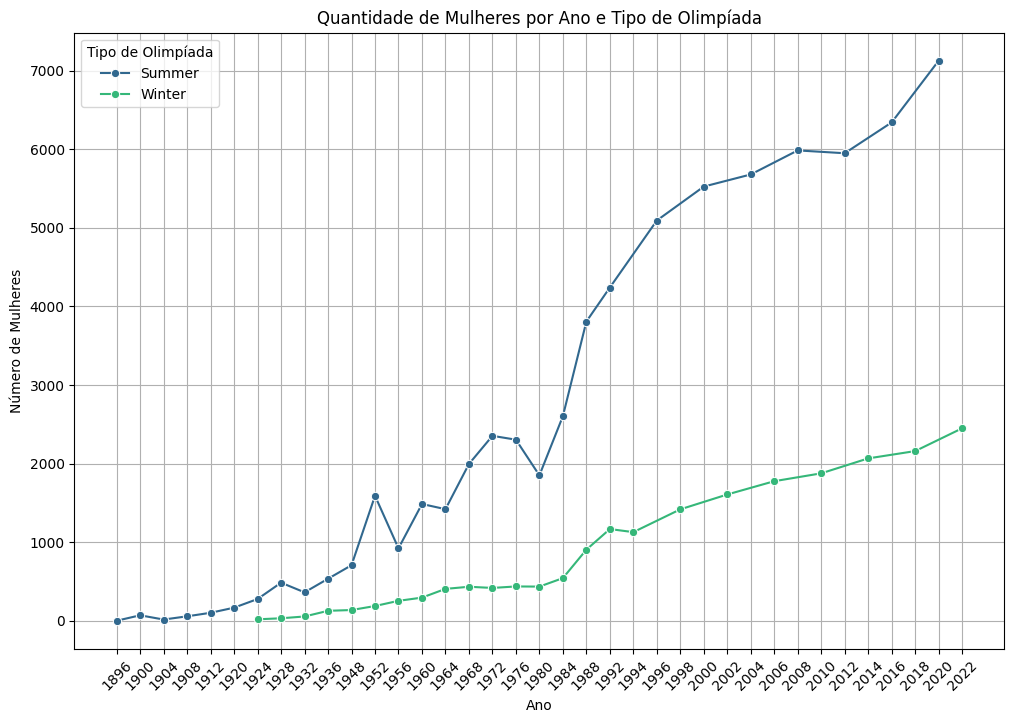

In [87]:

# Agrupar por 'ano' e 'tipo', e contar o número de mulheres
contagem_female = df_female.groupby(['ano', 'tipo']).size().reset_index(name='count')

# Criar o gráfico de linha
plt.figure(figsize=(12, 8))


sns.lineplot(data=contagem_female, x='ano', y='count', hue='tipo', marker='o', palette='viridis')

plt.title('Quantidade de Mulheres por Ano e Tipo de Olimpíada')
plt.xlabel('Ano')
plt.ylabel('Número de Mulheres')
plt.grid(True)
plt.legend(title='Tipo de Olimpíada')
plt.xticks(rotation=45)
plt.show()

<ipython-input-90-195249363c23>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contagem_female_sport, x='sport', y='count', palette='viridis')


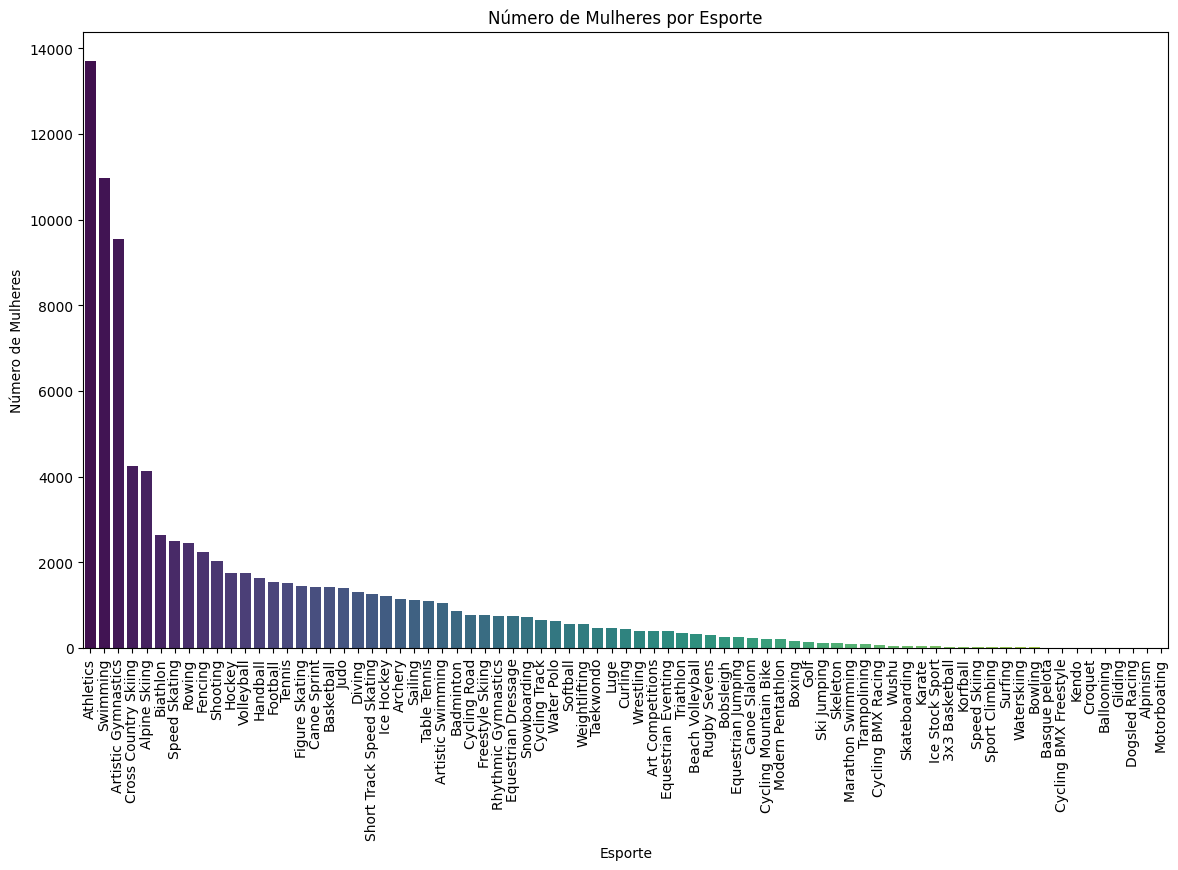

In [90]:
# Remover duplicatas com base no 'athlete_id' para garantir que cada atleta seja contado apenas uma vez por esporte
df_female_unique = df_female.drop_duplicates(subset='athlete_id')

# Agrupar por esporte e contar o número de atletas únicos
contagem_female_sport = df_female['sport'].value_counts().reset_index(name='count')
contagem_female_sport.columns = ['sport', 'count']

# Ordenar os esportes pelo número de participantes
contagem_female_sport = contagem_female_sport.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=contagem_female_sport, x='sport', y='count', palette='viridis')

plt.title('Número de Mulheres por Esporte')
plt.xlabel('Esporte')
plt.ylabel('Número de Mulheres')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.show()